In [1]:
%matplotlib inline
import pandas as pd
import plot_analysis as pa
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1718 = pd.read_csv('for_the_model.csv')
df1617 = pd.read_csv('for_the_model_2016_2017.csv')
df1819 = pd.read_csv('for_the_model_2018_2019.csv')
frames = [df1617, df1718, df1819]
df = pd.concat(frames)

## Distribution of Gazzetta Marks

As it is possible to notice, the Gazzetta Marks, has a clear distribution.

Its mean is around 6 and the variance is close to 3 units of differences. It presents an high percentage of 5.5 and 6.5.

Marks above 5.5 and over 7.5 are quite rare

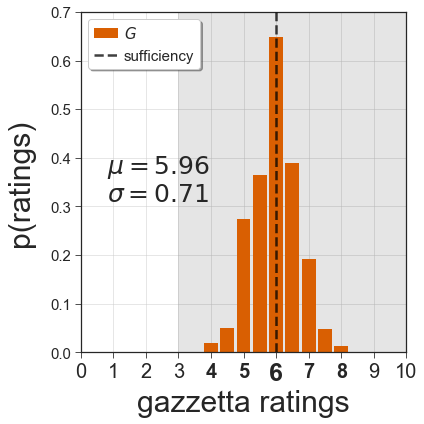

In [3]:
pa.plotDistribution(df.gazzetta_score, 'gazzetta')

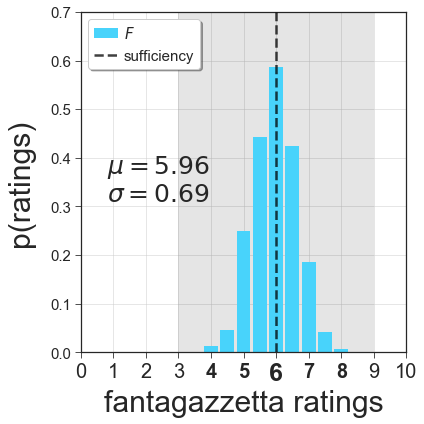

In [4]:
pa.plotDistribution(df.fantacalcio_score, 'fantagazzetta')

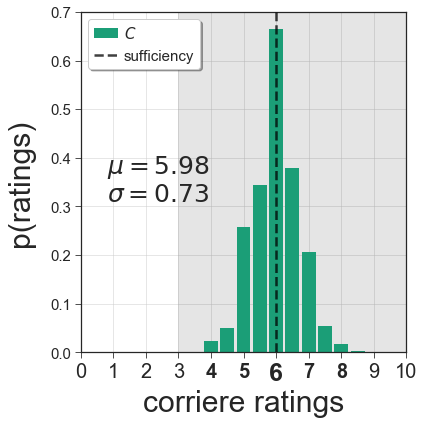

In [5]:
pa.plotDistribution(df.corriere_score, 'corriere')

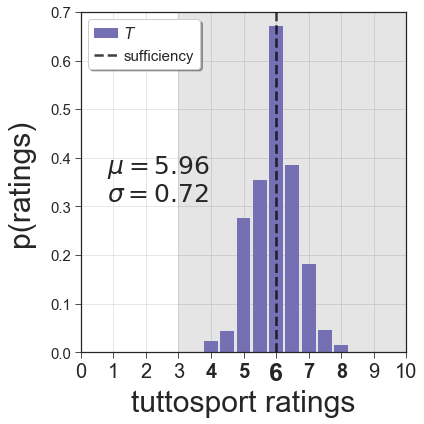

In [6]:
pa.plotDistribution(df.tuttosport_score, 'tuttosport')

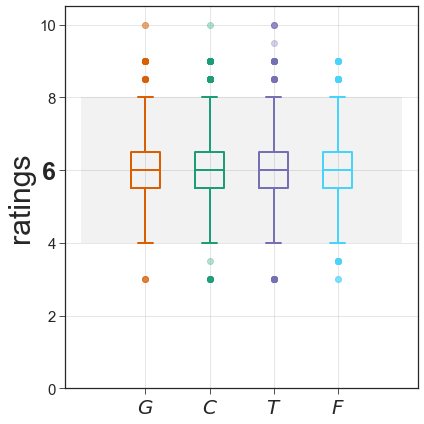

one_way ANOVA:  9.56729917621057 2.591703039371585e-06
102060 102060
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2   0.0253 0.001  0.0091  0.0415   True
     1      3  -0.0035   0.9 -0.0198  0.0127  False
     1      4  -0.0027   0.9  -0.019  0.0135  False
     2      3  -0.0289 0.001 -0.0451 -0.0127   True
     2      4  -0.0281 0.001 -0.0443 -0.0119   True
     3      4   0.0008   0.9 -0.0154   0.017  False
---------------------------------------------------


In [7]:
pa.plotBoxplotNewspaperDistribution(df.gazzetta_score, df.corriere_score, df.tuttosport_score, df.fantacalcio_score)

### Create Table for Role the metrics for each newspaper

In [8]:
stats = pa.table_statistics(df)              

In [9]:
stats

{'A': {'fantacalcio_score': {'corriere_score': {'r': 0.732,
    'ks': 0.044,
    'RMSE': 0.599,
    'disagreement': 0.228},
   'tuttosport_score': {'r': 0.714,
    'ks': 0.05,
    'RMSE': 0.613,
    'disagreement': 0.235},
   'gazzetta_score': {'r': 0.735,
    'ks': 0.033,
    'RMSE': 0.583,
    'disagreement': 0.214}},
  'corriere_score': {'fantacalcio_score': {'r': 0.732,
    'ks': 0.044,
    'RMSE': 0.599,
    'disagreement': 0.228},
   'tuttosport_score': {'r': 0.82,
    'ks': 0.016,
    'RMSE': 0.502,
    'disagreement': 0.178},
   'gazzetta_score': {'r': 0.836,
    'ks': 0.017,
    'RMSE': 0.475,
    'disagreement': 0.169}},
  'tuttosport_score': {'fantacalcio_score': {'r': 0.714,
    'ks': 0.05,
    'RMSE': 0.613,
    'disagreement': 0.235},
   'corriere_score': {'r': 0.82,
    'ks': 0.016,
    'RMSE': 0.502,
    'disagreement': 0.178},
   'gazzetta_score': {'r': 0.822,
    'ks': 0.017,
    'RMSE': 0.49,
    'disagreement': 0.178}},
  'gazzetta_score': {'fantacalcio_score': {'r'

In [10]:
listroles = []
listfirstcomp = []
listsecondcomp = []
listks = []
listr = []
listrmse = []
listdis = []
for el in stats:
    for el1 in stats[el]:
        for el2 in stats[el][el1]:
            listroles.append(el)
            listfirstcomp.append(el1[0].upper())
            listsecondcomp.append(el2[0].upper())
            listks.append(stats[el][el1][el2]['ks'])
            listr.append(stats[el][el1][el2]['r'])
            listrmse.append(stats[el][el1][el2]['RMSE'])
            listdis.append(stats[el][el1][el2]['disagreement'])
index_to_remove = [3,6,7,9,10,11,15,18,19,21,22,23,27,30,31,33,34,35,39,42,43,45,46,47]
d = pd.DataFrame()
d['role']  = listroles
d['newspaper 1'] = listfirstcomp
d['newspaper 2'] = listsecondcomp
d['ks'] = listks
d['r'] = listr
d['RMSE'] = listrmse
d['dis'] = listdis
d = d.drop(d.index[index_to_remove])

mean_per_role = {}
mean_per_role['A'] = {}
mean_per_role['C'] = {}
mean_per_role['D'] = {}
mean_per_role['P'] = {}
mean_per_role['A']['ks'] = 0
mean_per_role['A']['r'] = 0
mean_per_role['A']['rmse'] = 0
mean_per_role['A']['dis'] = 0
mean_per_role['C']['ks'] = 0
mean_per_role['C']['r'] = 0
mean_per_role['C']['rmse'] = 0
mean_per_role['C']['dis'] = 0
mean_per_role['D']['ks'] = 0
mean_per_role['D']['r'] = 0
mean_per_role['D']['rmse'] = 0
mean_per_role['D']['dis'] = 0
mean_per_role['P']['ks'] = 0
mean_per_role['P']['r'] = 0
mean_per_role['P']['rmse'] = 0
mean_per_role['P']['dis'] = 0
for el in d.values:
    mean_per_role[el[0]]['ks'] += el[3]
    mean_per_role[el[0]]['r'] += el[4]
    mean_per_role[el[0]]['rmse'] += el[5]
    mean_per_role[el[0]]['dis'] += el[6]
mean_per_role['A']['ks'] = mean_per_role['A']['ks']/6
mean_per_role['A']['r'] = mean_per_role['A']['r']/6
mean_per_role['A']['rmse'] = mean_per_role['A']['rmse']/6
mean_per_role['A']['dis'] = mean_per_role['A']['dis']/6
mean_per_role['C']['ks'] = mean_per_role['C']['ks']/6
mean_per_role['C']['r'] = mean_per_role['C']['r']/6
mean_per_role['C']['rmse'] = mean_per_role['C']['rmse']/6
mean_per_role['C']['dis'] = mean_per_role['C']['dis']/6
mean_per_role['D']['ks'] = mean_per_role['D']['ks']/6
mean_per_role['D']['r'] = mean_per_role['D']['r']/6
mean_per_role['D']['rmse'] = mean_per_role['D']['rmse']/6
mean_per_role['D']['dis'] = mean_per_role['D']['dis']/6
mean_per_role['P']['ks'] = mean_per_role['P']['ks']/6
mean_per_role['P']['r'] = mean_per_role['P']['r']/6
mean_per_role['P']['rmse'] = mean_per_role['P']['rmse']/6
mean_per_role['P']['dis'] = mean_per_role['P']['dis']/6
mean = {}
mean['ks'] = 0
mean['r'] = 0
mean['rmse'] = 0
mean['dis'] = 0
for el in d.values:
    mean['ks'] += el[3]
    mean['r'] += el[4]
    mean['rmse'] += el[5]
    mean['dis'] += el[6]
mean['ks'] = mean['ks']/24
mean['r'] = mean['r']/24
mean['rmse'] = mean['rmse']/24
mean['dis'] = mean['dis']/24

In [11]:
i = d.sort_values(['role', 'RMSE'], ascending=False)

In [12]:
mean_per_role

{'A': {'ks': 0.02950000000000001,
  'r': 0.7765,
  'rmse': 0.5436666666666666,
  'dis': 0.20033333333333334},
 'C': {'ks': 0.0265,
  'r': 0.6913333333333332,
  'rmse': 0.5423333333333333,
  'dis': 0.22916666666666666},
 'D': {'ks': 0.029666666666666664,
  'r': 0.6735000000000001,
  'rmse': 0.5396666666666666,
  'dis': 0.21983333333333335},
 'P': {'ks': 0.03333333333333333,
  'r': 0.7196666666666666,
  'rmse': 0.4848333333333334,
  'dis': 0.13766666666666666}}

In [13]:
mean

{'ks': 0.029750000000000013,
 'r': 0.71525,
 'rmse': 0.5276249999999999,
 'dis': 0.19675}

In [14]:
print(i.to_latex())

\begin{tabular}{llllrrrr}
\toprule
{} & role & newspaper 1 & newspaper 2 &     ks &      r &   RMSE &    dis \\
\midrule
36 &    P &           F &           C &  0.042 &  0.656 &  0.536 &  0.152 \\
37 &    P &           F &           T &  0.042 &  0.656 &  0.525 &  0.152 \\
38 &    P &           F &           G &  0.045 &  0.679 &  0.499 &  0.142 \\
40 &    P &           C &           T &  0.024 &  0.763 &  0.467 &  0.135 \\
41 &    P &           C &           G &  0.017 &  0.783 &  0.443 &  0.113 \\
44 &    P &           T &           G &  0.030 &  0.781 &  0.439 &  0.132 \\
25 &    D &           F &           T &  0.035 &  0.610 &  0.588 &  0.252 \\
24 &    D &           F &           C &  0.053 &  0.631 &  0.578 &  0.243 \\
26 &    D &           F &           G &  0.028 &  0.641 &  0.563 &  0.242 \\
28 &    D &           C &           T &  0.018 &  0.713 &  0.511 &  0.196 \\
32 &    D &           T &           G &  0.013 &  0.712 &  0.506 &  0.201 \\
29 &    D &           C &       

## Violin Plot Distribution of Marks

Each line inside the violin plot represent a newspaper. As it possible to notice from the legend we plot in different colour:
1. Gazzetta dello Sport -> orange
2. Corriere dello Sport -> green
3. Tuttosport -> violet
4. Fantacalcio -> light blue

The first three newspaper, more or less, follows the same distribution, probably because between phisical newspaper the criteria to judge a player are similar.

The last one, Fantacalcio, has a different distribution; all 4 of them have a peak nearly 6, but Fantacalcio also has high peaks around 5.5 and 6.5. This situation probably is influenced by the fact that fantagazzetta is more focused on Fantacalcio game and their methods of judging is more driven by the game instead by the performance. 

0.02137958063883989


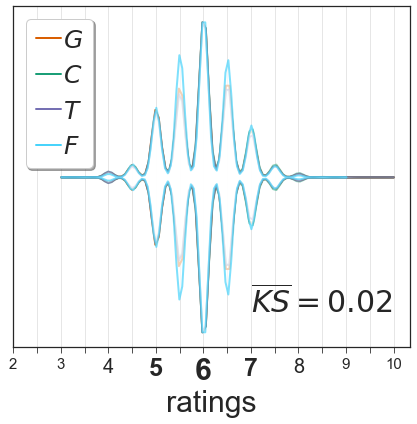

In [15]:
pa.plotViolinPlotNewspaperDistribution(df.gazzetta_score, df.corriere_score, df.tuttosport_score, df.fantacalcio_score)

0.8061532431902803
[0.28052569 0.93358303 2.43454155 ... 0.40758227 1.11504191 0.87563502]


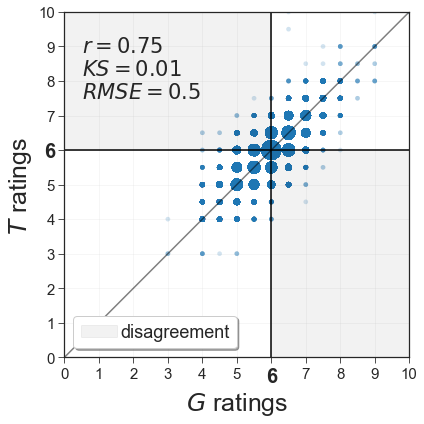

In [9]:
concordance = None
pa.correlation_newspapers(df.gazzetta_score, df.tuttosport_score, 'gazzetta', 'tuttosport', plot_type='scatter', concordance=concordance)

0.8201058201058201
[0.721952   1.16901183 0.16150829 ... 0.87826043 1.16901183 2.5552819 ]


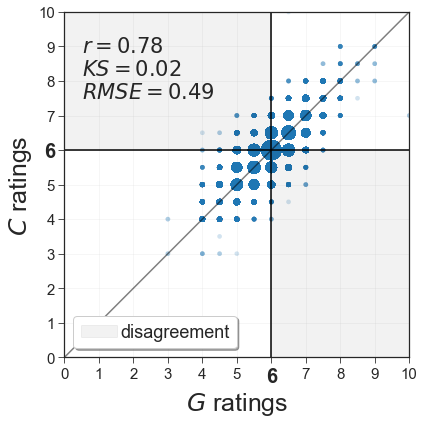

In [10]:
pa.correlation_newspapers(df.gazzetta_score, df.corriere_score, 'gazzetta', 'corriere', plot_type='scatter', concordance=concordance)

0.7688418577307466
[0.92106944 0.75102161 0.93577874 ... 0.37174653 0.75102161 1.86797929]


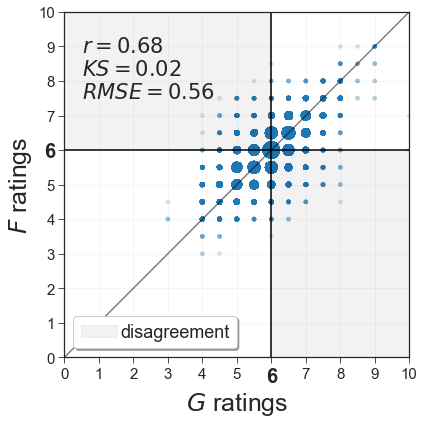

In [11]:
pa.correlation_newspapers(df.gazzetta_score, df.fantacalcio_score, 'gazzetta', 'fantagazzetta', plot_type='scatter', concordance=concordance)

0.807329022143837
[0.5550645  0.91716004 0.18588126 ... 0.11892884 1.04997252 0.85283539]


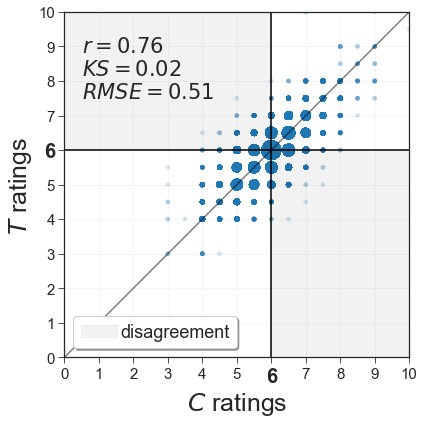

In [12]:
pa.correlation_newspapers(df.corriere_score, df.tuttosport_score, 'corriere', 'tuttosport', plot_type='scatter', concordance=concordance)

0.7631981187536743
[0.83728596 0.72995993 0.45677388 ... 0.14000814 0.72995993 1.80383244]


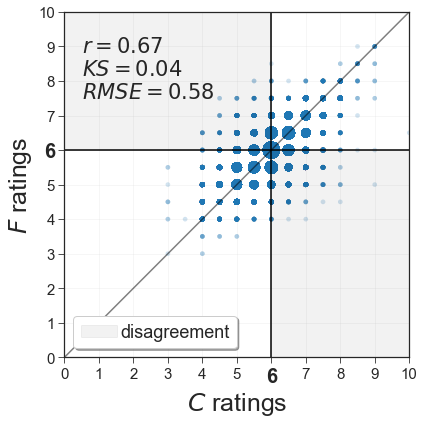

In [13]:
pa.correlation_newspapers(df.corriere_score, df.fantacalcio_score, 'corriere', 'fantagazzetta', plot_type='scatter', concordance=concordance)

0.7573192239858907
[0.621335   1.78965598 0.95583709 ... 0.46396591 0.72174152 0.72174152]


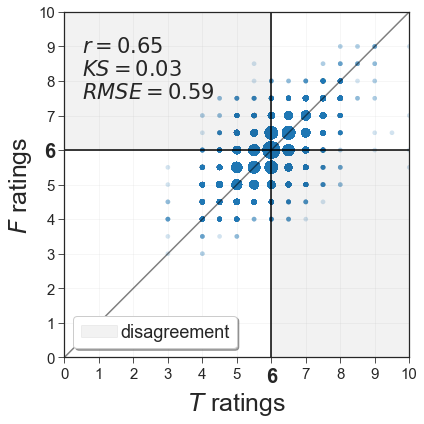

In [14]:
pa.correlation_newspapers(df.tuttosport_score, df.fantacalcio_score, 'tuttosport', 'fantagazzetta', plot_type='scatter', concordance=concordance)

## Marks distribution analyzed by Role
Since Gazzetta, Corriere and Tuttosport share more or less the same distribution, in this script we will analyzed only the difference between Gazzetta distribution and Fantagazzetta distribution.

Is possible to clearly notice some differences w.r.t. the total mark distribution:

1. Forward player, but also midfielder, has an high probability to score a mark close to 6 but also to 5.5. This immediately suggest us that if a forward doesn't score a goal, has an high probability to take low marks.
2. Fantacalcio forward has higher peak in 5.5 w.r.t. 6.
3. Forward and Goalkeeper has an higher probabilty to score ratings higher than 6.5. This is because they are the ones that, with more probability could make an importan action for the final result.

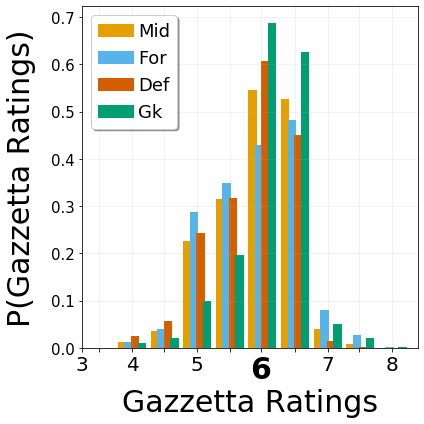

In [3]:
#make a separate list of ratings for each role
midfielderGazzetta = list(df[df['player_role_newspaper'] == 'C']['gazzetta_score'])
forwardGazzetta = list(df[df['player_role_newspaper'] == 'A']['gazzetta_score'])
defenceGazzetta = list(df[df['player_role_newspaper'] == 'D']['gazzetta_score'])
goalkeeperGazzetta = list(df[df['player_role_newspaper'] == 'P']['gazzetta_score'])

pa.plotHistogramRoleMarkDistribution(midfielderGazzetta,forwardGazzetta, defenceGazzetta, goalkeeperGazzetta, 'Gazzetta Ratings')

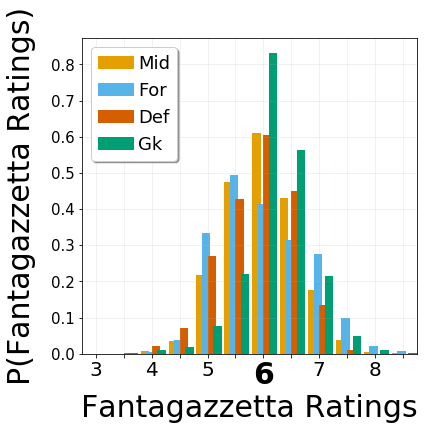

In [4]:
#make a separate list of ratings for each role
midfielderFanta = list(df[df['player_role_fantacalcio'] == 'C']['fantacalcio_score'])
forwardFanta = list(df[df['player_role_fantacalcio'] == 'A']['fantacalcio_score'])
defenceFanta = list(df[df['player_role_fantacalcio'] == 'D']['fantacalcio_score'])
goalkeeperFanta = list(df[df['player_role_fantacalcio'] == 'P']['fantacalcio_score'])

pa.plotHistogramRoleMarkDistribution(midfielderFanta, forwardFanta, defenceFanta, goalkeeperFanta, 'Fantagazzetta Ratings')

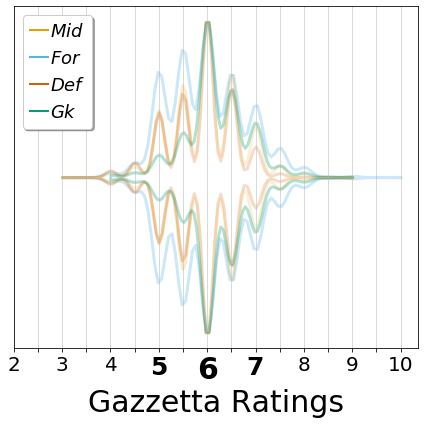

In [4]:
pa.plotViolinPlotRolesMarkDistribution(midfielderGazzetta, forwardGazzetta, defenceGazzetta, goalkeeperGazzetta, 'Gazzetta')

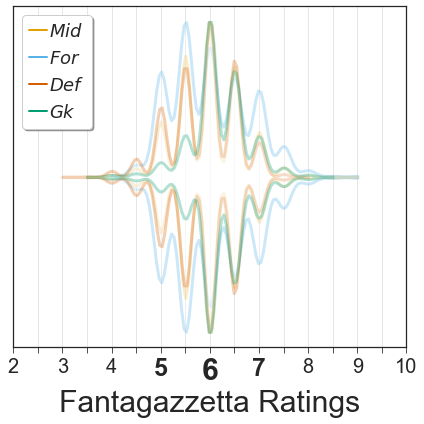

In [15]:
pa.plotViolinPlotRolesMarkDistribution(midfielderFanta, forwardFanta, defenceFanta, goalkeeperFanta, 'Fantagazzetta')

## Correlation between Player rank and Gazzetta score

Correlation 0.029118681416049338


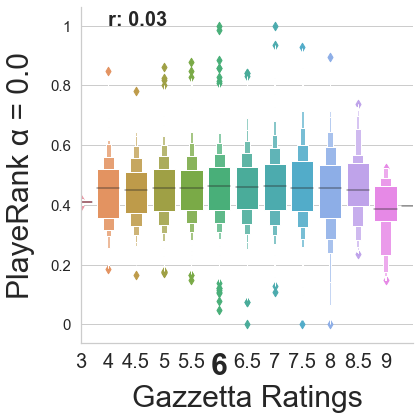

In [31]:
withoutRatings = df.copy(deep=True)
withoutRatings = withoutRatings.dropna(how='any',axis=0) 
labels = [3,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9]
sns.set(rc={'figure.figsize':(6,10)})
sns.set_style("whitegrid")

ax = sns.catplot(x="gazzetta_score", y="ratings_total_alpha", kind='boxen',
            data=withoutRatings, size = 6 , aspect=1)
axes = ax.axes.flatten()
axes[0].set_ylabel("PlayeRank α = 0.0", fontsize = 30, labelpad=15)
for ax in axes:
    ax.set_xlabel("Gazzetta Ratings", fontsize = 30)
    ax.set_xticklabels(labels, fontsize = 20)
    ax.xaxis.get_major_ticks()[5].label1.set_fontweight('bold')
    ax.xaxis.get_major_ticks()[5].label1.set_fontsize(30)
    ax.set_xlim(0,12)
axes[0].set_yticklabels([0,0,0.2,0.4,0.6,0.8,1], fontsize=15)
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.ratings_total_alpha)[0][1]))
plt.annotate('r: ' + str(round(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.ratings_total_alpha)[0][1], 2)), (1,1), fontweight = 'bold', fontsize=20)
plt.tight_layout()
ff = ax.get_figure()
ff.savefig('img/correlation_0_player_rank.pdf')
plt.show()

Correlation 0.327222212331346


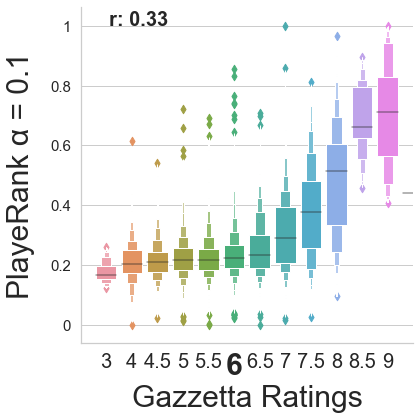

In [37]:
ax = sns.catplot(x="gazzetta_score", y="ratings_9", kind='boxen',
            data=withoutRatings, size=6, aspect=1)
axes = ax.axes.flatten()
axes[0].set_ylabel("PlayeRank α = 0.1", fontsize = 30, labelpad=15)
for ax in axes:
    ax.set_xlabel("Gazzetta Ratings", fontsize = 30)
    ax.set_xticklabels(labels, fontsize = 20)
    ax.xaxis.get_major_ticks()[5].label1.set_fontweight('bold')
    ax.xaxis.get_major_ticks()[5].label1.set_fontsize(30)
    ax.set_xlim(-1,12)
axes[0].set_yticklabels([0,0,0.2,0.4,0.6,0.8,1], fontsize=15)
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.ratings_9)[0][1]))
plt.annotate('r: ' + str(round(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.ratings_9)[0][1], 2)), (0.1,1), fontweight = 'bold', fontsize=20)
plt.tight_layout()
ff = ax.get_figure()
ff.savefig('img/correlation_10_player_rank.pdf')
plt.show()

Correlation 0.4126766447915071


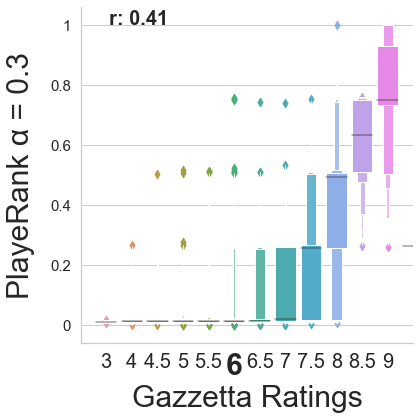

In [38]:
ax = sns.catplot(x="gazzetta_score", y="ratings_3", kind='boxen',
            data=withoutRatings,size=6, aspect=1)
axes = ax.axes.flatten()
axes[0].set_ylabel("PlayeRank α = 0.3", fontsize = 30, labelpad=15)
for ax in axes:
    ax.set_xlabel("Gazzetta Ratings", fontsize = 30)
    ax.set_xticklabels(labels, fontsize = 20)
    ax.xaxis.get_major_ticks()[5].label1.set_fontweight('bold')
    ax.xaxis.get_major_ticks()[5].label1.set_fontsize(30)
    ax.set_xlim(-1,12)
axes[0].set_yticklabels([0,0,0.2,0.4,0.6,0.8,1], fontsize=15)
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.ratings_3)[0][1]))
plt.annotate('r: ' + str(round(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.ratings_3)[0][1], 2)), (0.1,1), fontweight = 'bold', fontsize=20)
plt.tight_layout()
ff = ax.get_figure()
ff.savefig('img/correlation_30_player_rank.pdf')
plt.show()

Correlation 0.41001175481657776


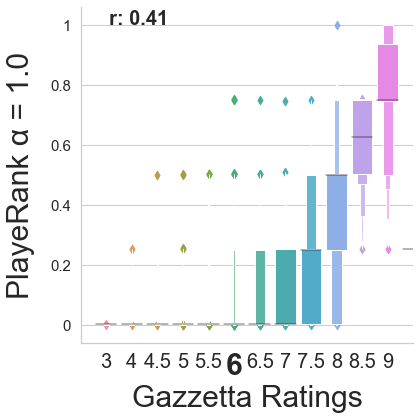

In [40]:
ax = sns.catplot(x="gazzetta_score", y="ratings", kind='boxen',
            data=withoutRatings, size=6, aspect=1)
axes = ax.axes.flatten()
axes[0].set_ylabel("PlayeRank α = 1.0", fontsize = 30, labelpad=15)
for ax in axes:
    ax.set_xlabel("Gazzetta Ratings", fontsize = 30)
    ax.set_xticklabels(labels, fontsize = 20)
    ax.xaxis.get_major_ticks()[5].label1.set_fontweight('bold')
    ax.xaxis.get_major_ticks()[5].label1.set_fontsize(30)
    ax.set_xlim(-1,12)
axes[0].set_yticklabels([0,0,0.2,0.4,0.6,0.8,1], fontsize=15)
ax.set(xlabel='Gazzetta Ratings', ylabel='PlayeRank α = 1.0')
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.ratings)[0][1]))
plt.annotate('r: ' + str(round(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.ratings)[0][1], 2)), (0.1,1), fontweight = 'bold', fontsize=20)
plt.tight_layout()
ff = ax.get_figure()
ff.savefig('img/correlation_90_player_rank.pdf')
plt.show()

## Boxplot to put in relation victory with final mark

This boxplot aim to figure out if the victory of the team influence the final evaluation fo the individual; The answer is yes, is possible to notice from yellow boxes (winning ones) that the average mark value is 6.5.
Instead from the blu boxes (not winning ones) the average values are 5.5 and 6.0. 
This discrepancy suggest us that final indiviudal mark is influenced by the team result and also that the victory is one of the key criteria to decide a individual rating.

In [3]:
import statistics
#compute mean and standard deviation
voti = df[df['winner'] == 1]['fantacalcio_score']
std = statistics.stdev(voti)
m = statistics.mean(voti)
print('Deviazione Standard ' + str(round(std,3)))
print('Media ' + str(m))

Deviazione Standard 0.607
Media 6.322365702479339


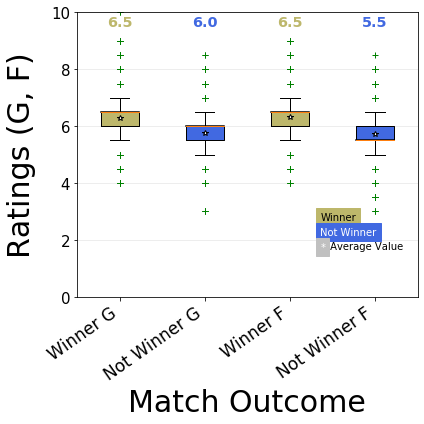

In [3]:
wingazzetta = df[df['winner'] == 1]['gazzetta_score']
notwingazzetta = df[df['winner'] == 0]['gazzetta_score']

winfanta = df[df['winner'] == 1]['fantacalcio_score']
notwinfanta = df[df['winner'] == 0]['fantacalcio_score']

pa.boxplotCorrelationWinFinalMark(wingazzetta, notwingazzetta, winfanta, notwinfanta)

In [21]:
pa.computeChiSquareTest(df.winner, df.gazzetta_score, 'Winner', 'Score Gazzetta')

contingency_table :-
 Score Gazzetta  3.0   4.0   4.5   5.0   5.5   6.0   6.5   7.0   7.5   8.0   \
Winner                                                                       
0                  4   238   584  3018  3659  4982  2404   790   120    34   
1                  0    15    47   474   998  3277  2575  1664   479   126   

Score Gazzetta  8.5   9.0   10.0  
Winner                            
0                  2     0     0  
1                  8    15     2  
Observed Values :-
 [[   4  238  584 3018 3659 4982 2404  790  120   34    2    0    0]
 [   0   15   47  474  998 3277 2575 1664  479  126    8   15    2]]
Expected Values :-
 [[2.48246130e+00 1.57015677e+02 3.91608270e+02 2.16718871e+03
  2.89020557e+03 5.12566196e+03 3.09004370e+03 1.52299001e+03
  3.71748579e+02 9.92984519e+01 6.20615324e+00 9.30922986e+00
  1.24123065e+00]
 [1.51753870e+00 9.59843229e+01 2.39391730e+02 1.32481129e+03
  1.76679443e+03 3.13333804e+03 1.88895630e+03 9.31009994e+02
  2.27251421e+02 6.0

In [7]:
pa.computeChiSquareTest(df.winner, df.fantacalcio_score, 'Winner', 'Score Fantacalcio')

contingency_table :-
 Score Fantacalcio  3.0  3.5  4.0  4.5   5.0   5.5   6.0   6.5   7.0  7.5  8.0  \
Winner                                                                          
0                    3   10  153  569  2851  4564  4419  2455   720   78   12   
1                    0    0    4   24   325  1092  3063  2969  1647  451   80   

Score Fantacalcio  8.5  9.0  
Winner                       
0                    1    0  
1                   15   10  
Observed Values :-
 [[   3   10  153  569 2851 4564 4419 2455  720   78   12    1    0]
 [   0    0    4   24  325 1092 3063 2969 1647  451   80   15   10]]
Expected Values :-
 [[1.86184597e+00 6.20615324e+00 9.74366059e+01 3.68024887e+02
  1.97107427e+03 3.51020027e+03 4.64344386e+03 3.36621752e+03
  1.46899647e+03 3.28305507e+02 5.70966098e+01 9.92984519e+00
  6.20615324e+00]
 [1.13815403e+00 3.79384676e+00 5.95633941e+01 2.24975113e+02
  1.20492573e+03 2.14579973e+03 2.83855614e+03 2.05778248e+03
  8.98003527e+02 2.00694493e

In [23]:
pa.computeChiSquareTest(pd.qcut(df['contextual_expecatition'], q=20), df.gazzetta_score, 'Bet', 'Score Gazzetta')

contingency_table :-
 Score Gazzetta              3.0   4.0   4.5   5.0   5.5   6.0   6.5   7.0   \
Bet                                                                          
(1.0590000000000002, 1.19]     1     7    22   115   176   443   303   181   
(1.19, 1.29]                   0    13    16   123   200   447   329   179   
(1.29, 1.36]                   0    12    33   122   179   401   269   145   
(1.36, 1.44]                   0     5    21   106   193   475   279   151   
(1.44, 1.55]                   0    10    29   136   200   420   247   145   
(1.55, 1.66]                   1    16    27   131   190   423   246   168   
(1.66, 1.8]                    0    15    26   217   269   580   328   176   
(1.8, 1.9]                     1     6    23   134   164   341   208    93   
(1.9, 2.04]                    0    17    39   196   210   388   262   106   
(2.04, 2.2]                    0    11    26   188   294   504   307   142   
(2.2, 2.37]                    0     7    

Correlation -0.13669855778266563


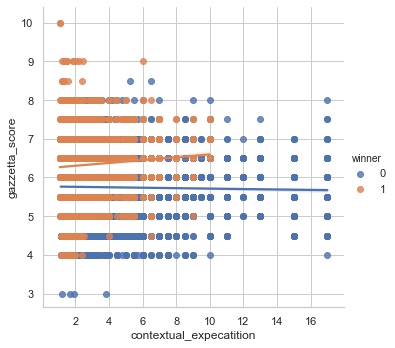

In [24]:
sns.lmplot(x="contextual_expecatition", y="gazzetta_score", hue="winner", data=df)
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.contextual_expecatition)[0][1]))

## Correlation between Assist/Goal with Marks
Concerning the assist feature, the correlation is coherent, since it is an active participation to goal, with a human perception of player performance. 
Moreover, this is more visible in the goal correlation. Goals are the most important event inside a game; they are the ones that determine the final result and the player who scored one is seen from an outsider as a player that contributes to winning. 
A strange behavior is visible only in assist correlation since defense performance depend slightly less than other position to the assist technical feature (probably because defense player are evaluated from human to other different metrics).

Correlation 0.20688486260484532


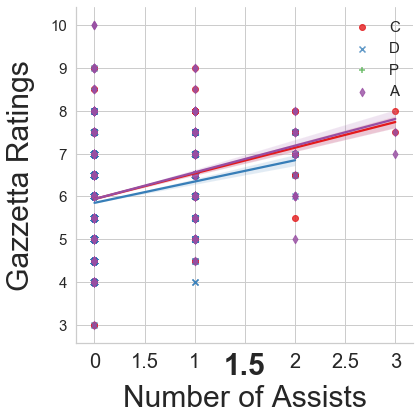

In [25]:
ax = sns.lmplot(x="assist_passes", y="gazzetta_score", hue="player_role_newspaper", data=df,
           markers=["o", "x", "+", "d"], palette="Set1",size=6,aspect=1, legend = False);

axes = ax.axes.flatten()
axes[0].set_ylabel("Gazzetta Ratings", fontsize = 30, labelpad=15)
for ax in axes:
    ax.set_xlabel("Number of Assists", fontsize = 30)
    ax.set_xticklabels([0,0,1.5,1,1.5,2,2.5,3,3.5,4], fontsize = 20)
    ax.set_yticklabels([3,3,4,5,6,7,8,9,10], fontsize = 15)
    ax.xaxis.get_major_ticks()[4].label1.set_fontweight('bold')
    ax.xaxis.get_major_ticks()[4].label1.set_fontsize(30)
print('Correlation ' + str(np.corrcoef(withoutRatings.gazzetta_score, withoutRatings.assist_passes)[0][1]))
plt.tight_layout()
ff = ax.get_figure()
plt.legend(fontsize=15)
ff.savefig('img/corr_assist_mark.pdf')

plt.show()

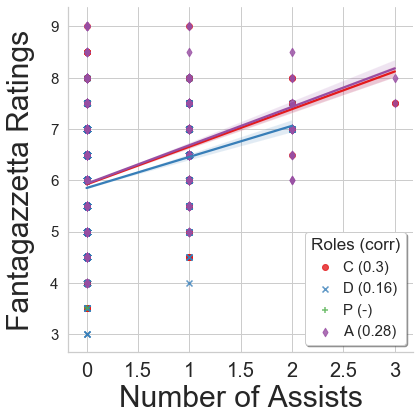

In [21]:
ax = sns.lmplot(x="assist_passes", y="fantacalcio_score", hue="player_role_fantacalcio", data=df,
           markers=["o", "x", "+", "d"], palette="Set1",size=6,aspect=1, legend = False);

axes = ax.axes.flatten()
axes[0].set_ylabel("Fantagazzetta Ratings", fontsize = 30, labelpad=15)
for ax in axes:
    ax.set_xlabel("Number of Assists", fontsize = 30)
    ax.set_xticklabels([0,0,1.5,1,1.5,2,2.5,3,3.5], fontsize = 20)
    ax.set_yticklabels([3,3,4,5,6,7,8,9,10], fontsize = 15)
    #ax.xaxis.get_major_ticks()[4].label1.set_fontweight('bold')
    #ax.xaxis.get_major_ticks()[4].label1.set_fontsize(30)
corratt = round(np.corrcoef(withoutRatings[withoutRatings['player_role_fantacalcio'] == 'A']['fantacalcio_score'], withoutRatings[withoutRatings['player_role_fantacalcio']=='A']['assist_passes'])[0][1],2)
corrmid = round(np.corrcoef(withoutRatings[withoutRatings['player_role_fantacalcio'] == 'C']['fantacalcio_score'], withoutRatings[withoutRatings['player_role_fantacalcio']=='C']['assist_passes'])[0][1],2)
corrdef = round(np.corrcoef(withoutRatings[withoutRatings['player_role_fantacalcio'] == 'D']['fantacalcio_score'], withoutRatings[withoutRatings['player_role_fantacalcio']=='D']['assist_passes'])[0][1],2)
corrgk = round(np.corrcoef(withoutRatings[withoutRatings['player_role_fantacalcio'] == 'P']['fantacalcio_score'], withoutRatings[withoutRatings['player_role_fantacalcio']=='P']['assist_passes'])[0][1],2)
if(np.isnan(corrgk)):
    corrgk = '-'
plt.tight_layout()
ff = ax.get_figure()
L = plt.legend(fontsize=15, frameon=True, shadow=True, handlelength=1.6, handletextpad=0.4, title='Roles (corr)')
L.get_texts()[0].set_text(L.get_texts()[0].get_text() + ' (' + str(corrmid)+')')
L.get_texts()[1].set_text(L.get_texts()[1].get_text() + ' (' + str(corrdef)+')')
L.get_texts()[2].set_text(L.get_texts()[2].get_text() + ' (' + str(corrgk)+')')
L.get_texts()[3].set_text(L.get_texts()[3].get_text() + ' (' + str(corratt)+')')
plt.setp(L.get_title(),fontsize=17)
ff.savefig('img/corr_assist_mark.pdf')
plt.show()

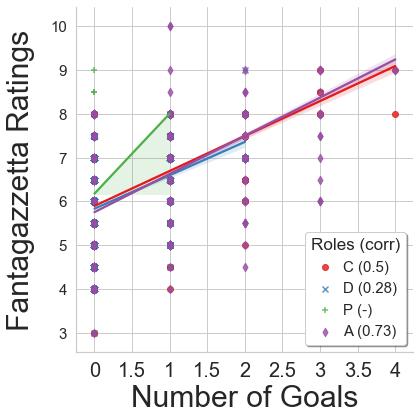

In [22]:
ax = sns.lmplot(x="goal_shot", y="gazzetta_score", hue="player_role_newspaper", data=df,
           markers=["o", "x", "+", "d"], palette="Set1",size=6,aspect=1, legend = False);

axes = ax.axes.flatten()
axes[0].set_ylabel("Fantagazzetta Ratings", fontsize = 30, labelpad=15)
for ax in axes:
    ax.set_xlabel("Number of Goals", fontsize = 30)
    ax.set_xticklabels([0,0,1.5,1,1.5,2,2.5,3,3.5,4], fontsize = 20)
    ax.set_yticklabels([3,3,4,5,6,7,8,9,10], fontsize = 15)
    #ax.xaxis.get_major_ticks()[5].label1.set_fontweight('bold')
    #ax.xaxis.get_major_ticks()[5].label1.set_fontsize(30)
corratt = round(np.corrcoef(withoutRatings[withoutRatings['player_role_fantacalcio'] == 'A']['fantacalcio_score'], withoutRatings[withoutRatings['player_role_fantacalcio']=='A']['goal_shot'])[0][1],2)
corrmid = round(np.corrcoef(withoutRatings[withoutRatings['player_role_fantacalcio'] == 'C']['fantacalcio_score'], withoutRatings[withoutRatings['player_role_fantacalcio']=='C']['goal_shot'])[0][1],2)
corrdef = round(np.corrcoef(withoutRatings[withoutRatings['player_role_fantacalcio'] == 'D']['fantacalcio_score'], withoutRatings[withoutRatings['player_role_fantacalcio']=='D']['goal_shot'])[0][1],2)
corrgk = round(np.corrcoef(withoutRatings[withoutRatings['player_role_fantacalcio'] == 'P']['fantacalcio_score'], withoutRatings[withoutRatings['player_role_fantacalcio']=='P']['goal_shot'])[0][1],2)
if(np.isnan(corrgk)):
    corrgk = '-'
plt.tight_layout()
ff = ax.get_figure()
L = plt.legend(fontsize=15, frameon=True, shadow=True, handlelength=1.6, handletextpad=0.4, title = 'Roles (corr)')
L.get_texts()[0].set_text(L.get_texts()[0].get_text() + ' (' + str(corrmid)+')')
L.get_texts()[1].set_text(L.get_texts()[1].get_text() + ' (' + str(corrdef)+')')
L.get_texts()[2].set_text(L.get_texts()[2].get_text() + ' (' + str(corrgk)+')')
L.get_texts()[3].set_text(L.get_texts()[3].get_text() + ' (' + str(corratt)+')')
plt.setp(L.get_title(),fontsize=17)
ff.savefig('img/corr_goal_mark.pdf')
plt.show()

## Player Evolution During Gamesweek
single season

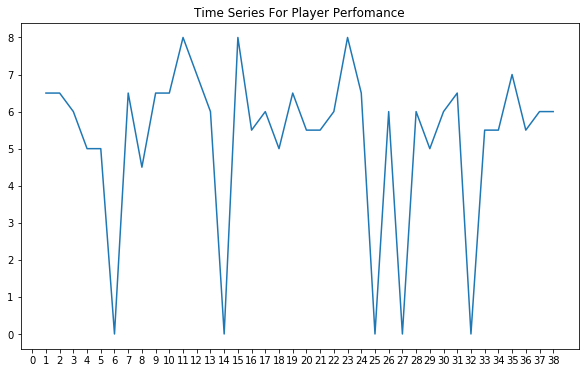

In [3]:
metrics = 'GAZZETTA'
series = pa.createDataframeForMarkEvolution(df1718, metrics)
series[3323].plot(figsize=(10,6), xticks=range(0, 39), legend = False, title = 'Time Series For Player Perfomance')

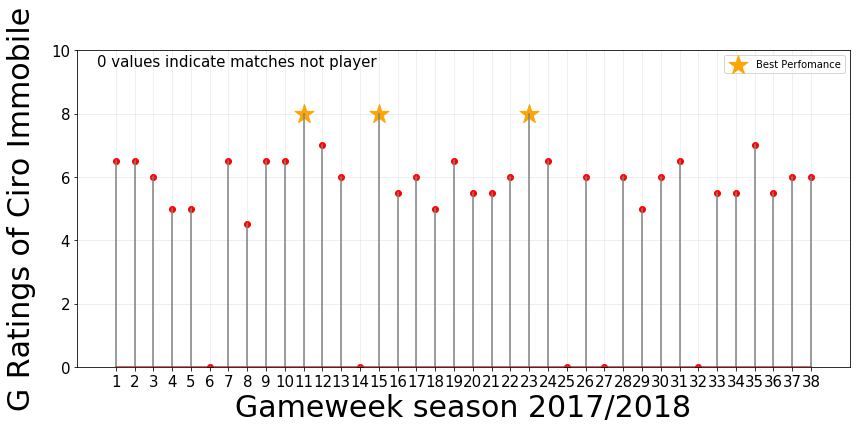

In [4]:
pa.scatterPlayerEvolution(series, 3323, 'Ciro Immobile', '2017/2018')

## Test Randomicity of Best Performance (GAZZETTA SCORE PART)

Foe the all players, we divided them into 3 different categories:
1. High Perfomance Players: those that have scored during the season at least a 8 as mark
2. Low Perfomance Players: those player that during season has scored at least a 4 as mark
3. Mid Perfomance Players: those players that didn't exeed the previous evaluation

A plot of a single player for each category is visible in the following cell.

Then for each category we plot the average score in each gameweek; analyzing the result came out that the mean of high performance players are always over the other two sets.

Mid performance players are the security, those players that more or less are close to sufficiency

#### parameters:
1. the series computed above
2. the number of zeros (the maximum number of games a player could not have played)
3. the min value a player has to score to be considered as "high performance player"
4. the value that a player has to score at least one time to be considered "low perfomance player"
5. Gazzetta if we use series, Playerrank if we use seriesRank

Percentage of Less than 4.5 : 	 	0.18620689655172415
Percentage of Betw 4.5 and 7.5 : 	 0.6
Percentage of Over 7.5 : 	 	0.21379310344827587
Lenght of high 31
Lenght of mid 87
Lenght of less 27


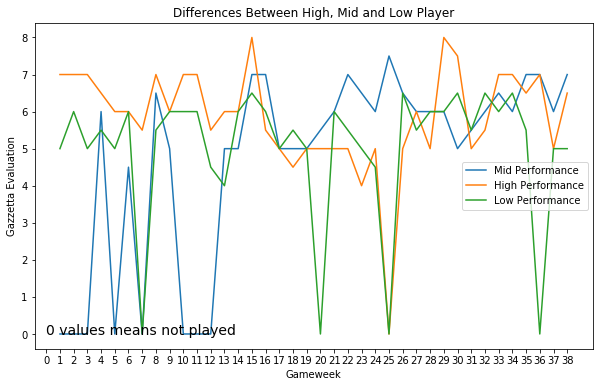

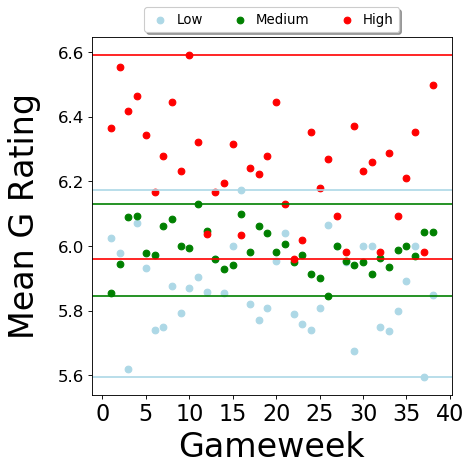

In [5]:
pa.plotDifferentPerformanceLevelOfPlayer(series, 11, 7.5, 4.5, 'Gazzetta')

The next plot is the one that compare a random distribution w.r.t. the normal distribution.

For each player we mantained the score distribution, the only modify we applyied is the shuffle of gamewweeks. This shuffle give a randomicity to the data.
Then we compute for each player the gameweek of the first best performance, then aggregating by gameweek we obtained a distribution. Using a min max scaler we normalize the distributions.

Is possible to notice that random distribution more or less follow the same path of the original distribution (is also visible from **dynamic time warping** computation). So is clear that is not possible to predict when a player could score a best performance.

#### Prameters:
1. the series computed
2. the name of the metrics used, Gazzetta if we use series, Playerrank if we use seriesRank
3. number of run (different random curve computation) need to be apply in order to deal with a original vs random comparison

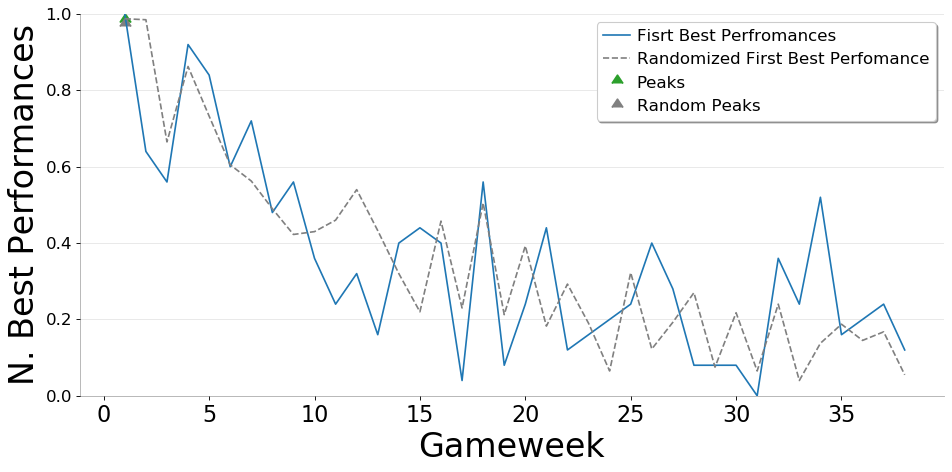

DTW computation between the two time series..
Time series 1 regarding number of first best performances
Time series 2 ragarding 5 run of shuffled perfomance w.r.t. number of first best perfomances
Only insertion Cost is keep..
Reallignment Cost :2.8949999999999996


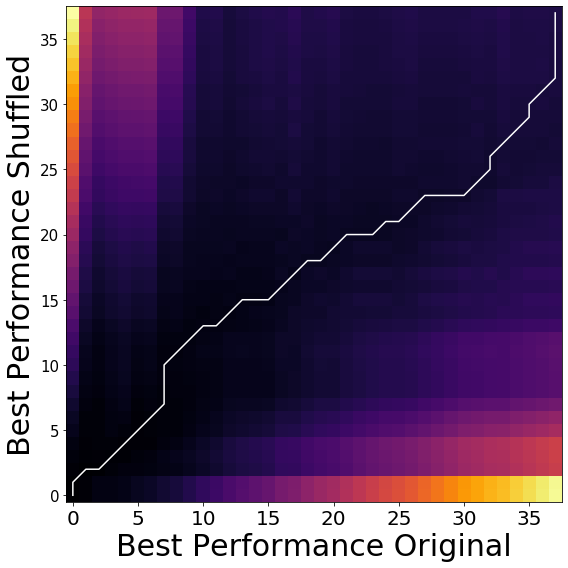

In [17]:
pa.distributionRandomEvolutionVsOriginalDistribution(series, 'Gazzetta',5)

## Test Randomicity of Best Performance (PLAYER RANK SCORE PART)

Foe the all players, we divided them into 3 different categories:
1. High Perfomance Players: those that have scored during the season at least a 8 as mark
2. Low Perfomance Players: those player that during season has scored at least a 4 as mark
3. Mid Perfomance Players: those players that didn't exeed the previous evaluation

A plot of a single player for each category is visible in the following cell.

Then for each category we plot the average score in each gameweek; analyzing the result came out that the mean of high performance players are always over the other two sets.

Mid performance players are the security, those players that more or less are close to sufficiency

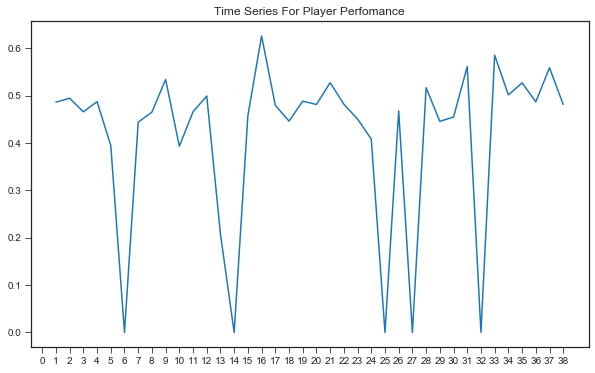

In [31]:
metrics = 'playerrank'
seriesRank = pa.createDataframeForMarkEvolution(df, metrics)
seriesRank[3323].plot(figsize=(10,6), xticks=range(0, 39), legend = False, title = 'Time Series For Player Perfomance')

Percentage of Less than 4.5 : 	 	0.2748091603053435
Percentage of Betw 4.5 and 7.5 : 	 0.5572519083969466
Percentage of Over 7.5 : 	 	0.16793893129770993
Lenght of high 22
Lenght of mid 73
Lenght of less 36


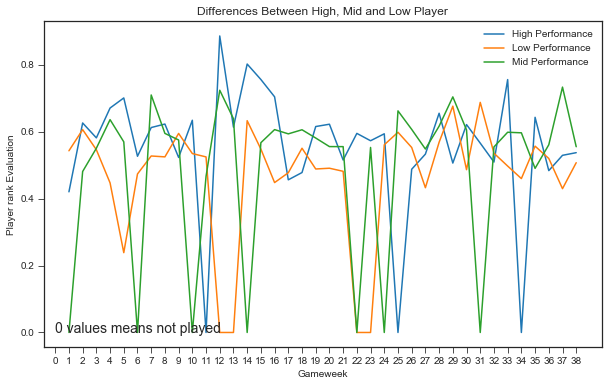

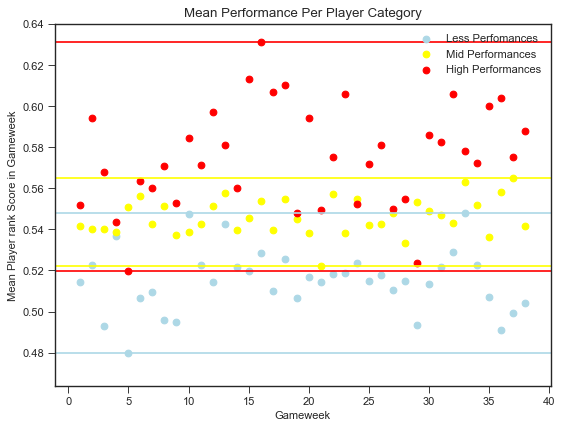

In [38]:
pa.plotDifferentPerformanceLevelOfPlayer(seriesRank, 11, 0.8, 0.4, 'Player rank')

The next plot represent the average impact in all the three player category of the scores, before and after the one with the highest impact. Is possible to see that, at exception with those days that player could not have played the path is more or less the same.

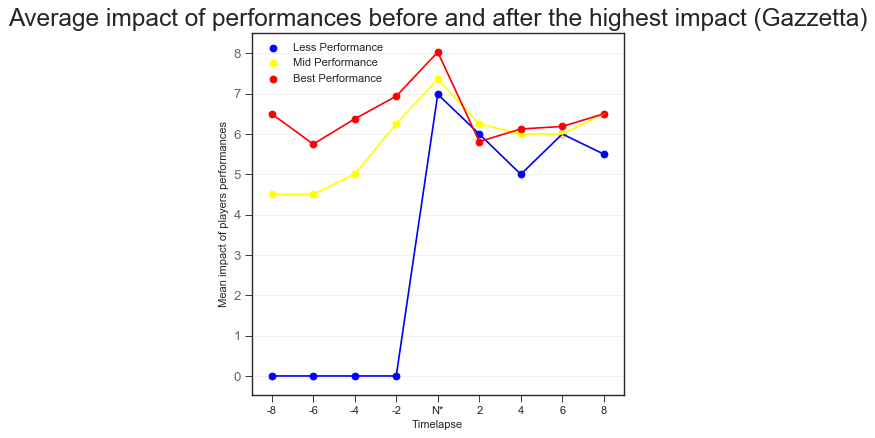

In [40]:
pa.plotBeforeandAfterHighestImpactInEachPlayerCategory(series, 13, 7.5, 4.5, 'Gazzetta')

The next plot is the one that compare a random distribution w.r.t. the normal distribution.

For each player we mantained the score distribution, the only modify we applyied is the shuffle of gamewweeks. This shuffle give a randomicity to the data.
Then we compute for each player the gameweek of the first best performance, then aggregating by gameweek we obtained a distribution. Using a min max scaler we normalize the distributions.

Is possible to notice that random distribution as path strange to the original distribution (is also visible from **dynamic time warping** computation more than 5.5).

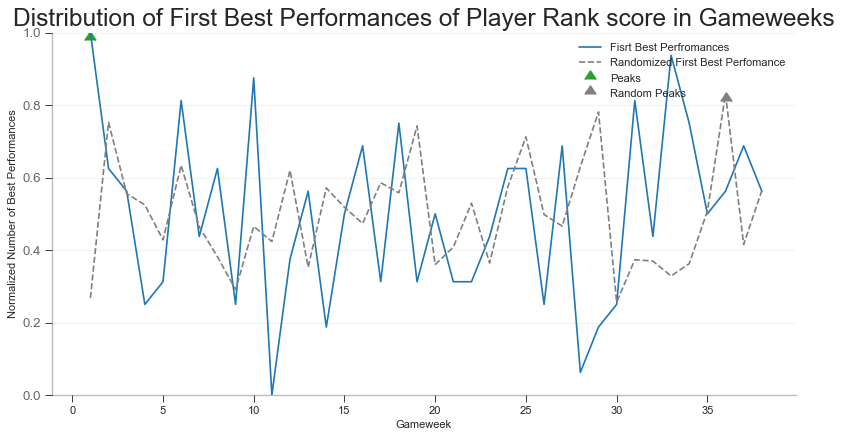

DTW computation between the two time series..
Time series 1 regarding number of first best performances
Time series 2 ragarding 10 run of shuffled perfomance w.r.t. number of first best perfomances
Only insertion Cost is keep..
Reallignment Cost :5.6695556640625


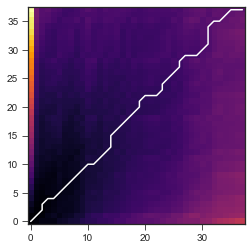

In [34]:
pa.distributionRandomEvolutionVsOriginalDistribution(seriesRank, 'Player Rank',10)

## Player Performance w.r.t Against Teams

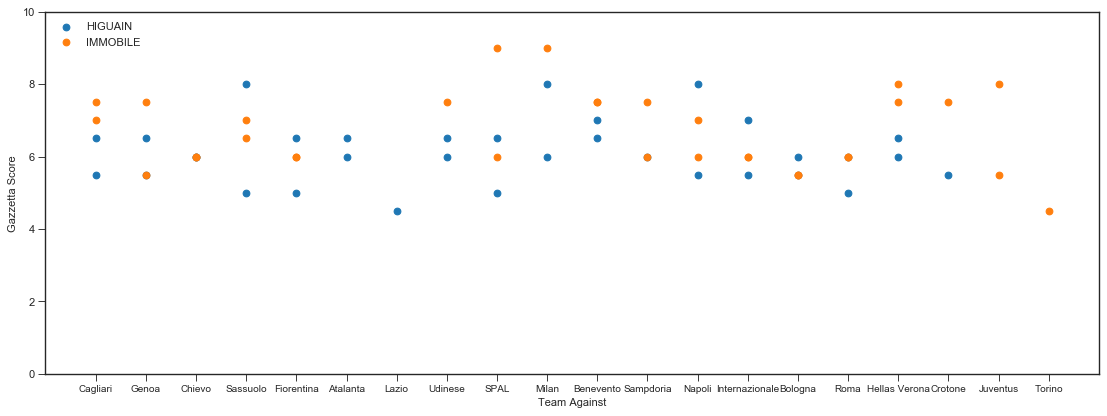

In [35]:
pa.plotTeamVersusPlayerPerformance(df,[3323, 21384], 'Gazzetta')

#### Distribution for each team of the number of against players best performances

For each team we compute the number of best perfomances for all the enemies pplayers. As expected the distribution follows a specific; the teams that has the most effective defense has a low number of against best performances 

#### Distribution for each team of the mean value for all against player's scores

For each team we compute the mean score for all the enemies players. The distribution is coherent with the leaderboard, the first 6/7 team are the ones where enemies player are evaluate in more severe way. Probably due to the strenght of the team.

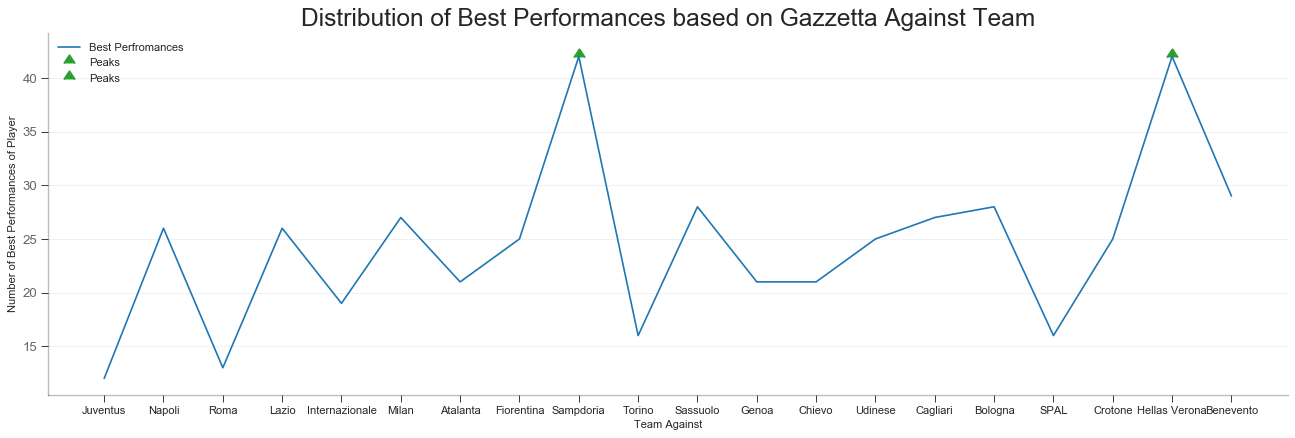

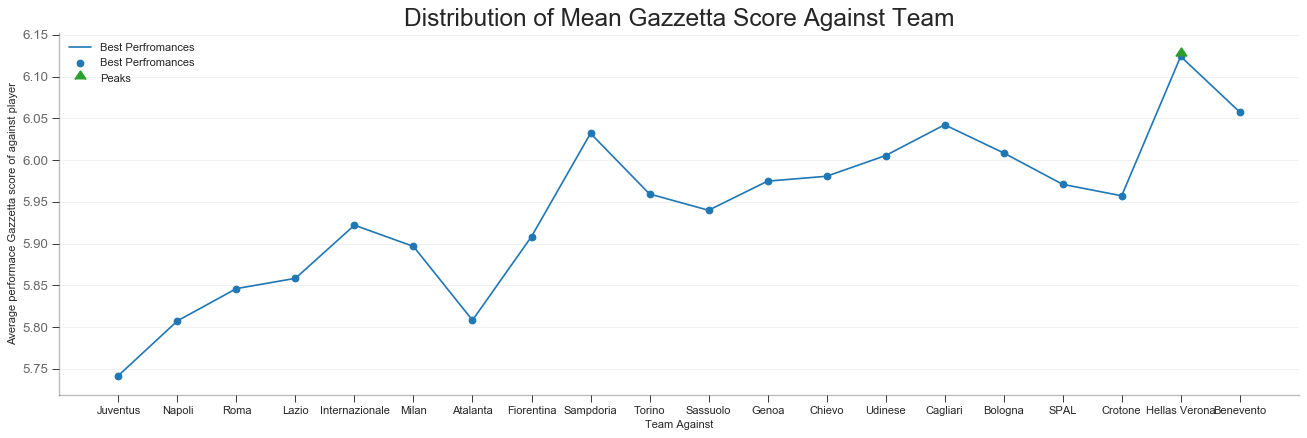

In [36]:
path = r'C:\Users\matte\Data Science\Tesi\InputDataset\2017-2018\matches_Italy.json'
pa.bestPerformanceAgainstTeamName(df, series, path, 'Gazzetta')